### Notebook content
- kdeplot<br>
- Regression plots<br>
- Plotting multiple variables<br>
- Facetting multiple regressions<br>
- Setting styles<br>
- Color palettes<br>
- Adding annotations<br>
- strpplot & swarmplot<br>
- Binning data<br>
- Creating and customizing headtmaps<br>
- FacetGrid and factorplot<br>
- PairGrid & pairplot<br>
- JointGrid & jointplot<br>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

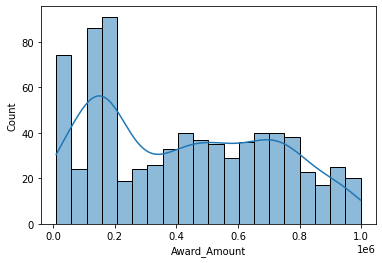

In [2]:
# Plot a histogram
si_df = pd.read_csv('schoolimprovement2010grants.csv')
sns.histplot(si_df['Award_Amount'], kde=True, bins=20)
plt.show()

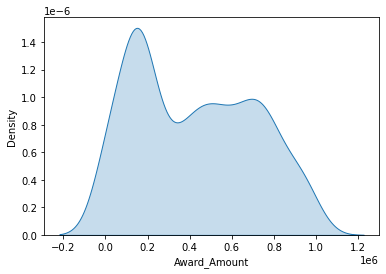

In [3]:
# Rug plot and kde shading
sns.kdeplot(si_df['Award_Amount'], fill=True
#              hist=False,
#              rug=True,
#              kde_kws={'shade':True}
           )
plt.show()

# Or use this
# sns.kdeplot(data=si_df, x='Award_Amount', fill=True)
# plt.show()

In [4]:
# sns.kdeplot(data=si_df, x='Award_Amount', fill=True)
# plt.show()

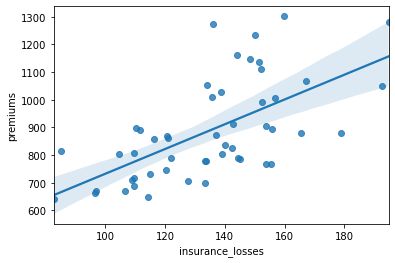

In [5]:
# Regression Plots in Seaborn
insurance_premiums = pd.read_csv('insurance_premiums.csv')
sns.regplot(data=insurance_premiums, x='insurance_losses', y='premiums')
plt.show()

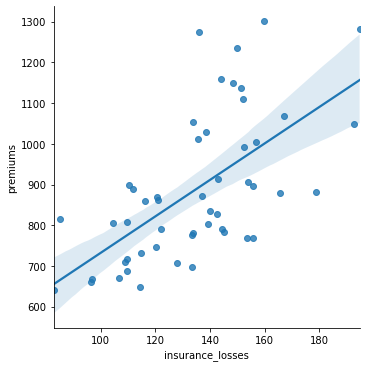

In [6]:
sns.lmplot(data=insurance_premiums, x='insurance_losses', y='premiums')
plt.show()

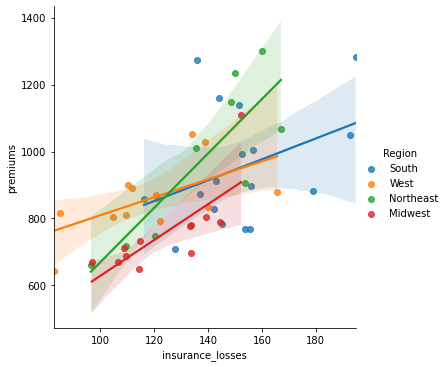

In [7]:
sns.lmplot(data=insurance_premiums,
           x="insurance_losses",
           y="premiums",
           hue="Region")

plt.show()

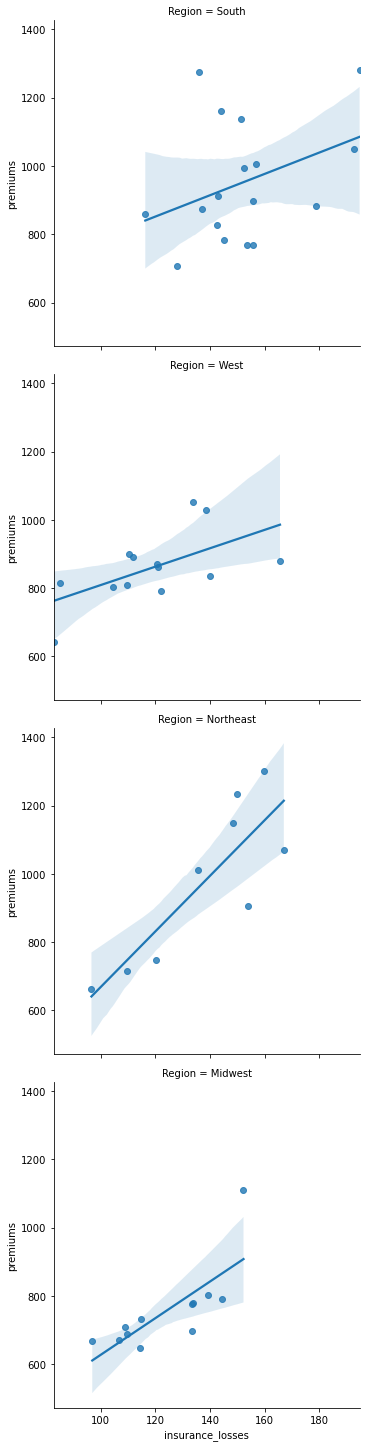

In [8]:
sns.lmplot(data=insurance_premiums,
           x="insurance_losses",
           y="premiums",
           row="Region")

plt.show()

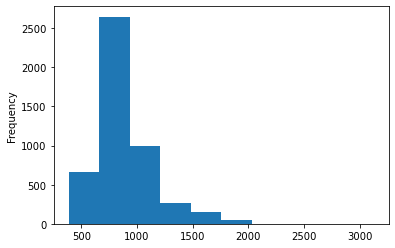

<Figure size 432x288 with 0 Axes>

In [9]:
fmr = pd.read_csv('FY18_4050_FMRs.csv')
fmr['fmr_2'].plot.hist()
plt.show()
plt.clf()

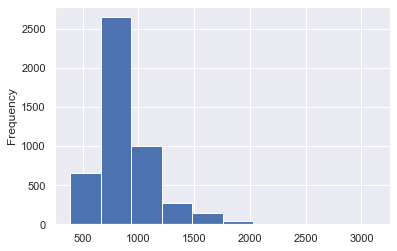

<Figure size 432x288 with 0 Axes>

In [10]:
# Set the default seaborn style
sns.set()
fmr['fmr_2'].plot.hist()
plt.show()
plt.clf()

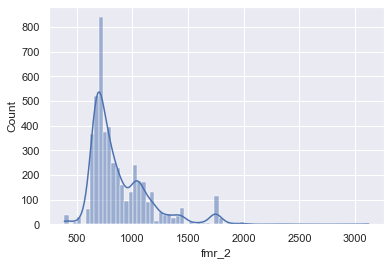

<Figure size 432x288 with 0 Axes>

In [11]:
sns.histplot(fmr['fmr_2'], kde=True)
sns.set_style('dark')
plt.show()
plt.clf()

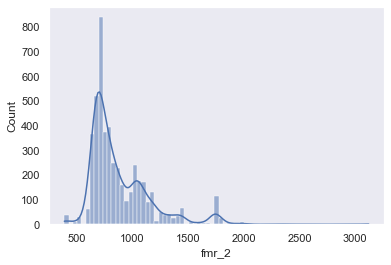

<Figure size 432x288 with 0 Axes>

In [12]:
sns.histplot(fmr['fmr_2'], kde=True)
sns.set_style('whitegrid')
plt.show()
plt.clf()

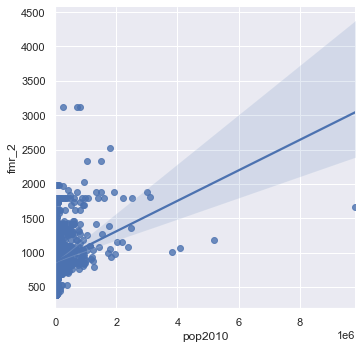

In [13]:
# Reset the seaborn default
sns.set()
sns.lmplot(data=fmr,
           x='pop2010',
           y='fmr_2')

# Remove the spines
sns.despine()

**Colors in Seaborn**

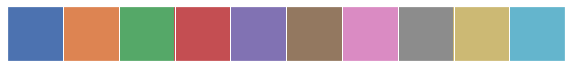

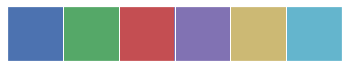

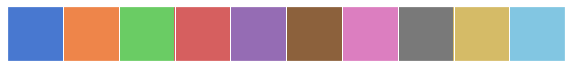

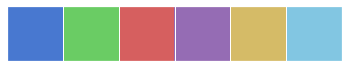

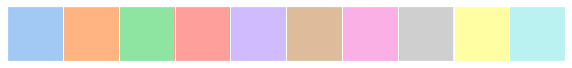

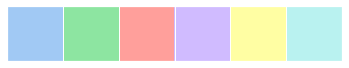

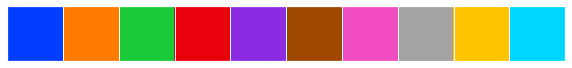

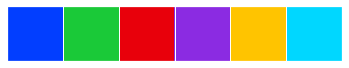

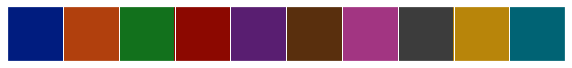

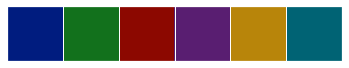

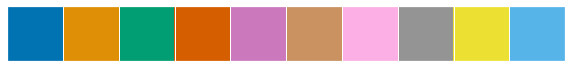

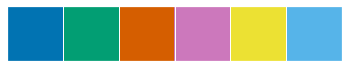

In [14]:
# Displaying palettes
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.palplot(sns.color_palette())
    plt.show()

D:\installations\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


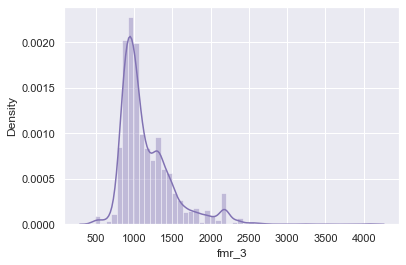

In [15]:
# Set style, enable color code, and create a magenta distplot
sns.set(color_codes=True)
sns.distplot(fmr['fmr_3'], color='m')
plt.show()

D:\installations\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


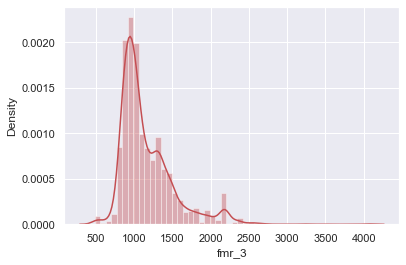

In [16]:
sns.distplot(fmr['fmr_3'], color='r')
plt.show()

D:\installations\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


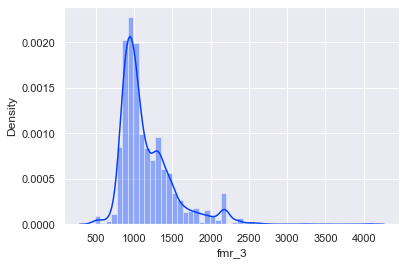

D:\installations\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


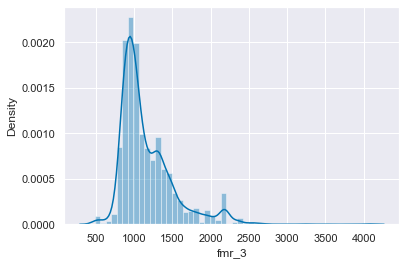

<Figure size 432x288 with 0 Axes>

In [17]:
# Using default palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.distplot(fmr['fmr_3'])
    plt.show()
    plt.clf()

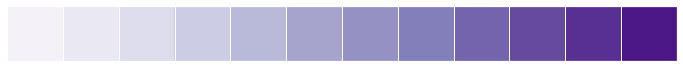

In [18]:
# Create and display a Purples sequential palette containing 8 colors.
sns.palplot(sns.color_palette("Purples", 12))
plt.show()

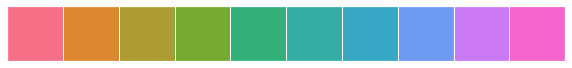

In [19]:
# Create and display a palette with 10 colors using the husl system.
sns.palplot(sns.color_palette('husl', 10))
plt.show()

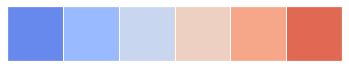

In [20]:
# Create and display a diverging palette with 6 colors coolwarm.
sns.palplot(sns.color_palette('coolwarm', 6))
plt.show()

**Customizing withmatplotlib**

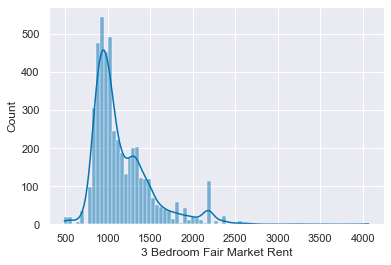

In [21]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.histplot(fmr['fmr_3'], ax=ax, kde=True)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent")
plt.show()

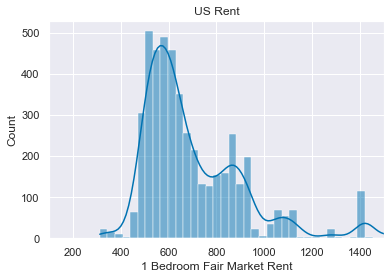

In [22]:
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.histplot(fmr['fmr_1'], ax=ax, kde=True)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent",
       xlim=(100,1500),
       title="US Rent")

# Display the plot
plt.show()

**Adding annotations**

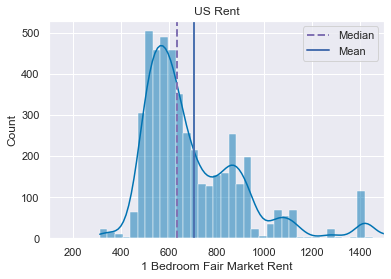

In [23]:
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.histplot(fmr['fmr_1'], ax=ax, kde=True)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=fmr['fmr_1'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=fmr['fmr_1'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

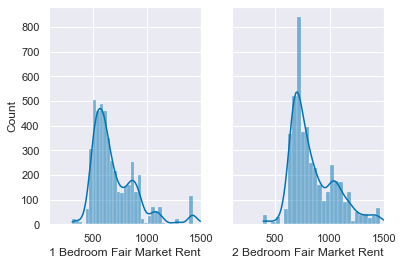

In [24]:
# Multiple plots
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.histplot(fmr['fmr_1'], ax=ax0, kde=True)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.histplot(fmr['fmr_2'], ax=ax1, kde=True)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()

**Overview of more complex plot types included in Seaborn.**

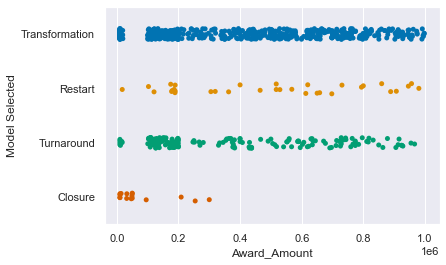

In [25]:
# Create the stripplot
sns.stripplot(data=si_df,
         x='Award_Amount',
         y='Model Selected',
         jitter=True)

plt.show()

D:\installations\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\installations\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


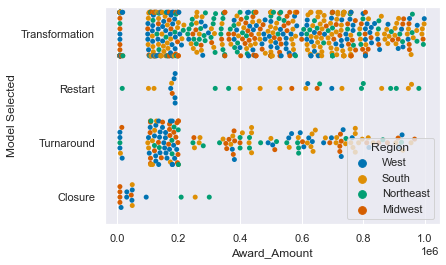

In [26]:
# Create and display a swarmplot with hue set to the Region
sns.swarmplot(data=si_df,
         x='Award_Amount',
         y='Model Selected',
         hue='Region')

plt.show()

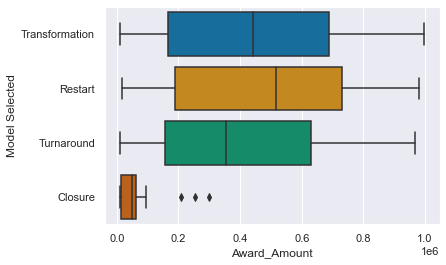

<Figure size 432x288 with 0 Axes>

In [27]:
# Create a boxplot
sns.boxplot(data=si_df,
         x='Award_Amount',
         y='Model Selected')

plt.show()
plt.clf()

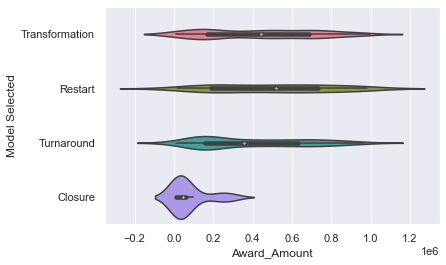

<Figure size 432x288 with 0 Axes>

In [28]:
# Create a violinplot with the husl palette
sns.violinplot(data=si_df,
         x='Award_Amount',
         y='Model Selected',
         palette='husl')

plt.show()
plt.clf()

In [29]:
# Create a lvplot with the Paired palette and the Region column as the hue
# sns.lvplot(data=si_df,
#          x='Award_Amount',
#          y='Model Selected',
#          palette='Paired',
#          hue='Region')

# plt.show()
# plt.clf()

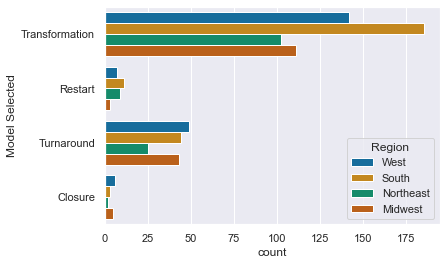

<Figure size 432x288 with 0 Axes>

In [30]:
# Show a countplot with the number of models used with each region a different color
sns.countplot(data=si_df,
         y="Model Selected",
         hue="Region")

plt.show()
plt.clf()

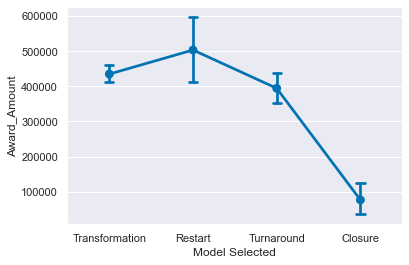

<Figure size 432x288 with 0 Axes>

In [31]:
# Create a pointplot and include the capsize in order to show caps on the error bars
sns.pointplot(data=si_df,
         y='Award_Amount',
         x='Model Selected',
         capsize=.1)

plt.show()
plt.clf()

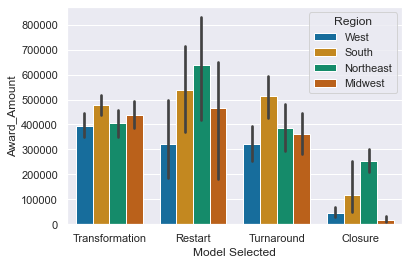

<Figure size 432x288 with 0 Axes>

In [32]:
# Create a barplot with each Region shown as a different color
sns.barplot(data=si_df,
         y='Award_Amount',
         x='Model Selected',
         hue='Region')

plt.show()
plt.clf()

**Regression Plots**

In [33]:
bike_share = pd.read_csv('bike_share.csv')

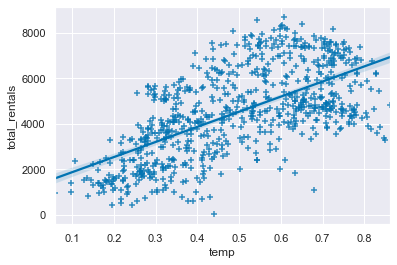

In [34]:
sns.regplot(data=bike_share, x='temp', y='total_rentals', marker='+')
plt.show()

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

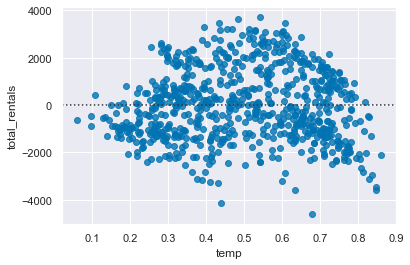

In [35]:
# The residual plot is a very useful plot for understanding the appropriateness of a regression model. 
sns.residplot(data=bike_share, x='temp', y='total_rentals')


<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

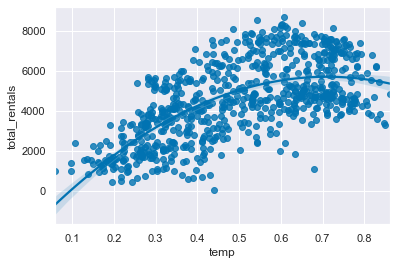

In [36]:
#  it looks like rentals might start to trail off if the weather gets too warm. 
sns.regplot(data=bike_share, x='temp', y='total_rentals', order=2)

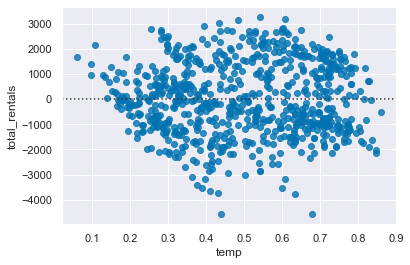

In [37]:
#  In this example, the values are more randomly distributed, so a second order equation is likely more appropriate for this problem. 
sns.residplot(data=bike_share, x='temp', y='total_rentals', order=2)
plt.show()

<AxesSubplot:xlabel='mnth', ylabel='total_rentals'>

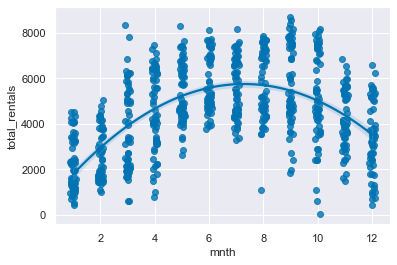

In [38]:
# In some cases, even with the jitter, it may be difficult to see if there are any trends based on the value of the variable.
sns.regplot(data=bike_share, x='mnth', y='total_rentals', x_jitter=.1, order=2)

<AxesSubplot:xlabel='mnth', ylabel='total_rentals'>

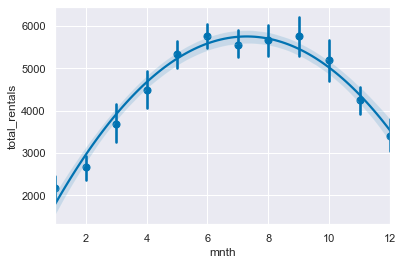

In [39]:
"""Using an estimator for the x value can provide another helpful view of the data. 
This simplified view shows a trend consistent with the seasons"""

import numpy as np
sns.regplot(data=bike_share, x='mnth', y='total_rentals', x_estimator=np.mean,order=2)

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

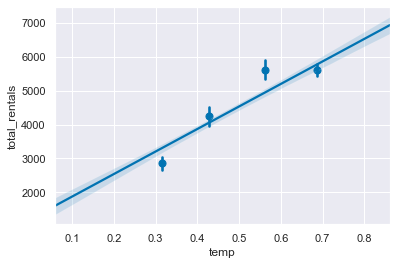

In [40]:
# This shortcut function can help with getting a quick read on continuous data such as temperature. 
sns.regplot(data=bike_share, x='temp', y='total_rentals', x_bins=4)

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

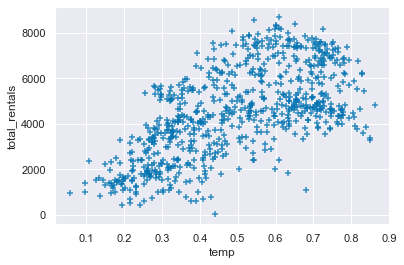

In [41]:
sns.regplot(data=bike_share, x='temp', y='total_rentals', marker='+', fit_reg=False)

**Matrix plots**

In [42]:
df_crosstab = pd.crosstab(bike_share['mnth'], bike_share['weekday'],
            values=bike_share['total_rentals'],
            aggfunc='mean')

df_crosstab

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1815.900000,1926.800000,2567.777778,2138.625000,2513.250000,2446.500000,1956.555556
2,2247.500000,2604.375000,2824.000000,2813.333333,2878.500000,2933.125000,2266.500000
3,3301.000000,3545.625000,3574.000000,3670.000000,3817.000000,3925.777778,3938.777778
4,4416.888889,4515.777778,4555.875000,4330.875000,4764.000000,4387.000000,4445.666667
5,5320.222222,4512.333333,5025.000000,5119.222222,5892.666667,5751.000000,5978.500000
6,5940.375000,5478.250000,5680.875000,5701.000000,5621.777778,5616.333333,6343.777778
7,5298.100000,5791.555556,5844.222222,5814.000000,5623.625000,5405.888889,5232.333333
8,4703.000000,5518.333333,5930.444444,6076.900000,6038.333333,5958.444444,5223.875000
9,6159.555556,5637.125000,5184.500000,5668.250000,5485.555556,5747.000000,6393.666667


In [43]:
bike_share.total_rentals[ (bike_share['mnth'] == 1) & (bike_share['weekday']== 0)].mean()

1815.9

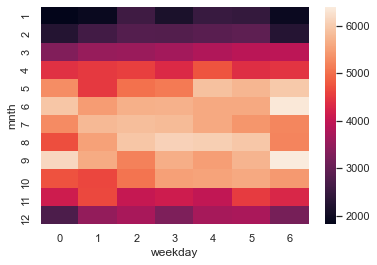

In [44]:
sns.heatmap(
pd.crosstab(bike_share['mnth'], bike_share['weekday'],
            values=bike_share['total_rentals'],
            aggfunc='mean'))
plt.show()

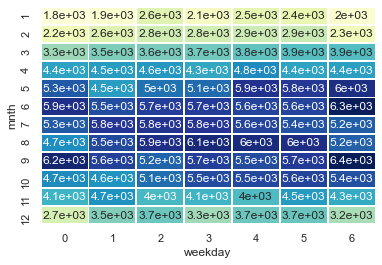

In [45]:
sns.heatmap(df_crosstab, annot=True, fmt=".2g", cmap='YlGnBu', cbar=False, linewidth=0.9)
plt.show()

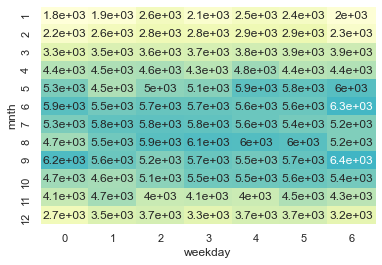

In [46]:
sns.heatmap(df_crosstab, annot=True, fmt=".2g", cmap='YlGnBu', cbar=False, center=df_crosstab.loc[9, 6])
plt.show()

<AxesSubplot:>

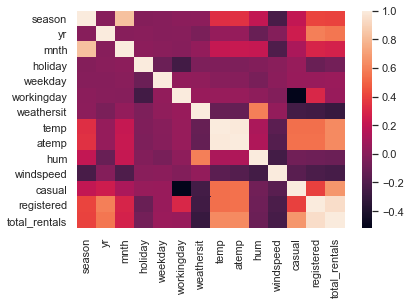

In [47]:
sns.heatmap(bike_share.corr())

**Using FacetGrid, factorplot and lmplot**

In [48]:
"""Seaborn's FacetGrid manages the back end data manipulations to make sure that the data is split across rows, columns, and hue and then used to make the appropriate plot type. """

"Seaborn's FacetGrid manages the back end data manipulations to make sure that the data is split across rows, columns, and hue and then used to make the appropriate plot type. "

In [49]:
college_data = pd.read_csv('college_datav3.csv')

D:\installations\anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


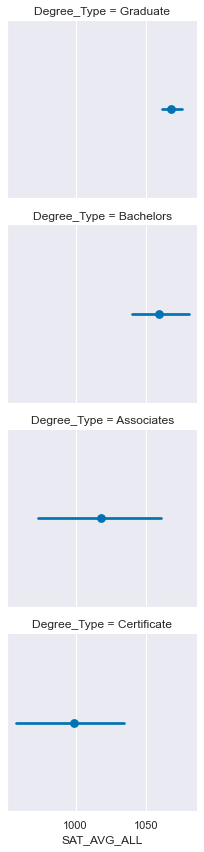

<Figure size 432x288 with 0 Axes>

In [50]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(college_data, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate']
                  )

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

D:\installations\anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


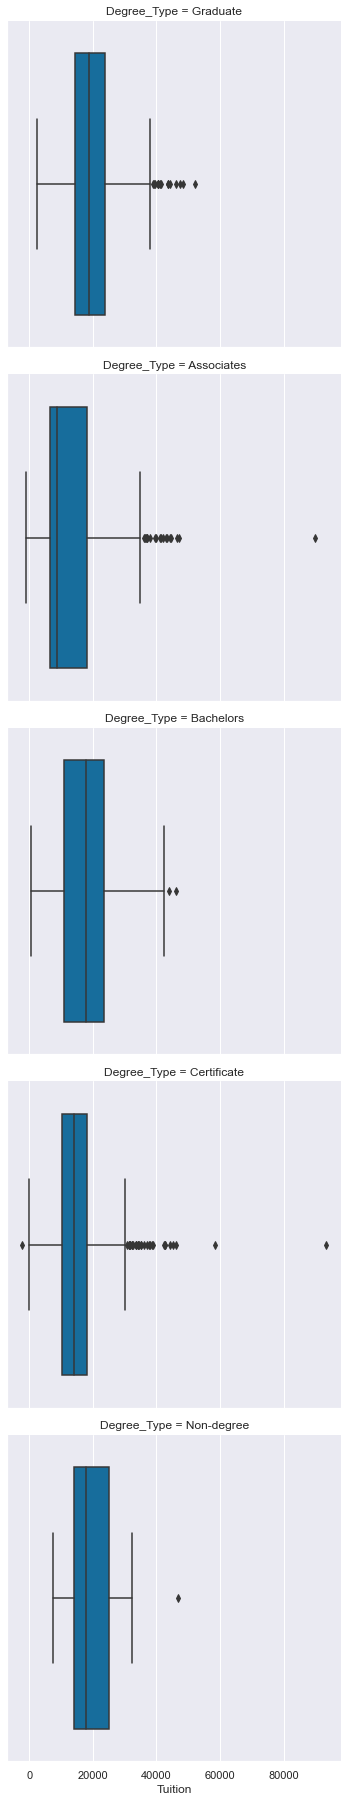

<Figure size 432x288 with 0 Axes>

In [51]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=college_data,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

D:\installations\anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


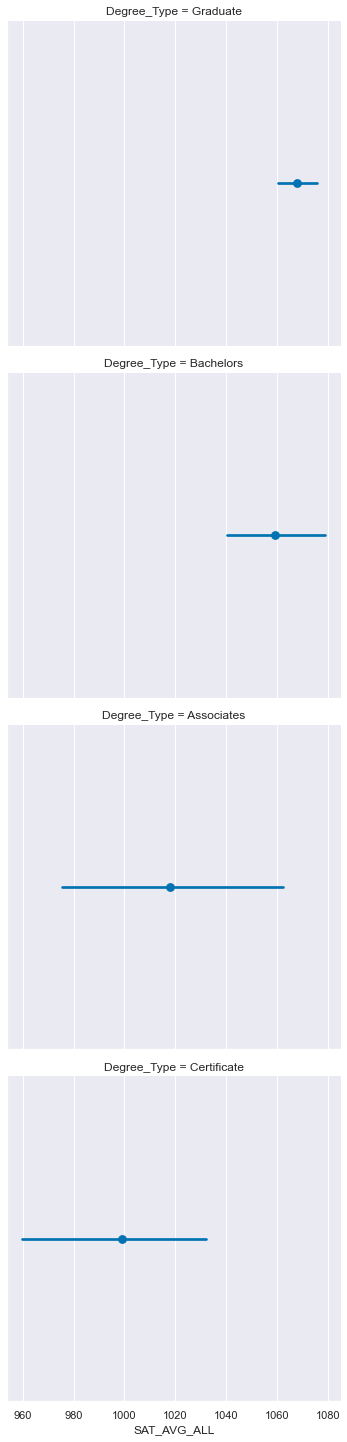

<Figure size 432x288 with 0 Axes>

In [52]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=college_data,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

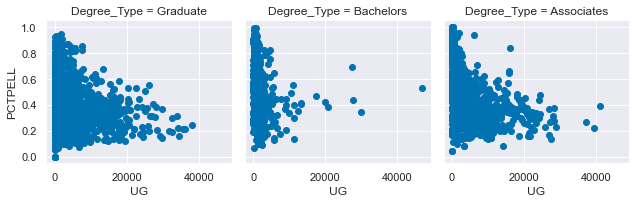

<Figure size 432x288 with 0 Axes>

In [53]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(college_data, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

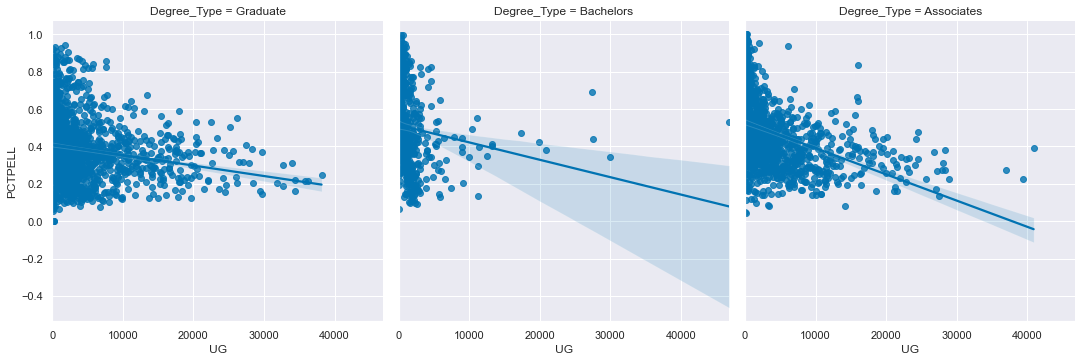

<Figure size 432x288 with 0 Axes>

In [54]:
# Re-create the plot above as an lmplot
sns.lmplot(data=college_data,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

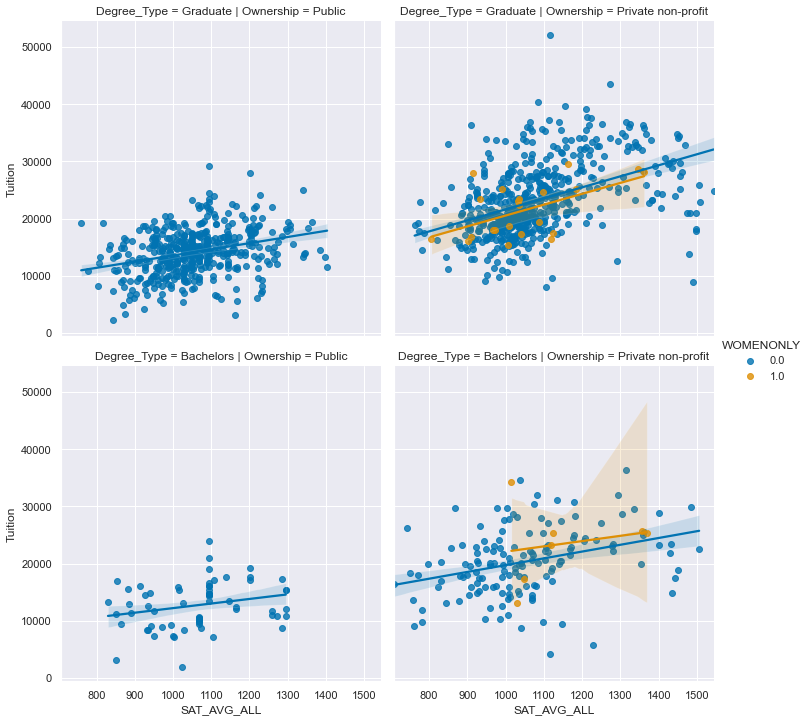

<Figure size 432x288 with 0 Axes>

In [55]:
inst_ord = ['Public', 'Private non-profit']
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=college_data,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

**Using PairGrid and pairplot**

In [56]:
"""These plots are similar to the FacetGrid, factorplot, and lmplots
   The difference with these plots is that we only define the columns of data we want to compare. 
"""

'These plots are similar to the FacetGrid, factorplot, and lmplots\n   The difference with these plots is that we only define the columns of data we want to compare. \n'

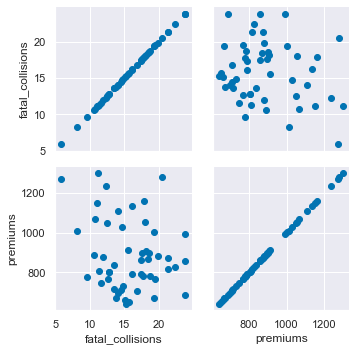

<Figure size 432x288 with 0 Axes>

In [57]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(insurance_premiums, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

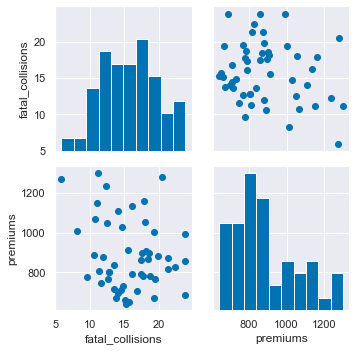

<Figure size 432x288 with 0 Axes>

In [58]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(insurance_premiums, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

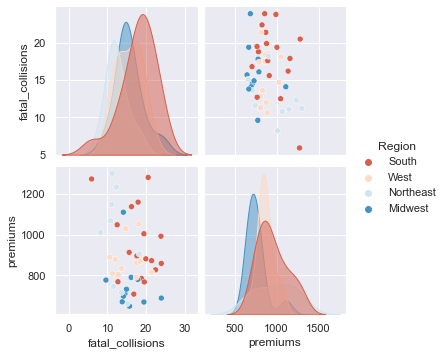

<Figure size 432x288 with 0 Axes>

In [59]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=insurance_premiums,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

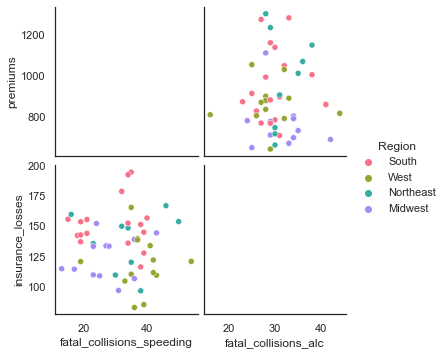

<Figure size 432x288 with 0 Axes>

In [60]:
sns.set_style('white')
# Build a pairplot with different x and y variables
sns.pairplot(data=insurance_premiums,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

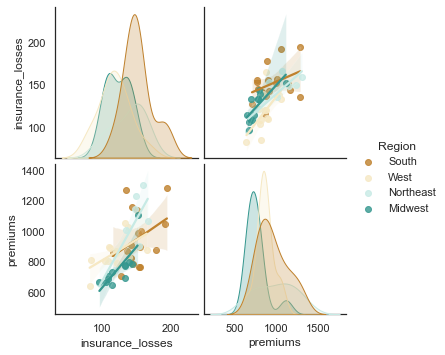

<Figure size 432x288 with 0 Axes>

In [61]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=insurance_premiums,
             vars=["insurance_losses", "premiums"],
             kind ='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

**Using JointGrid and jointplot**

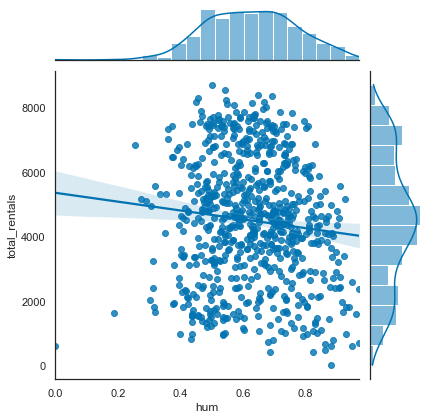

<Figure size 432x288 with 0 Axes>

In [62]:
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=bike_share)

plt.show()
plt.clf()

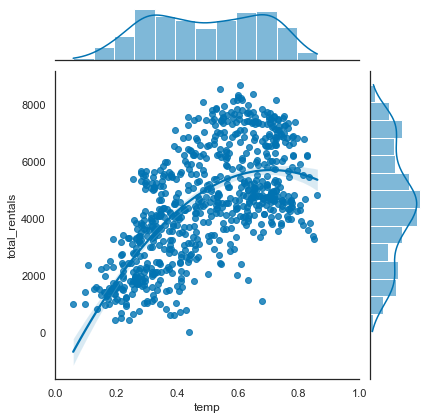

<Figure size 432x288 with 0 Axes>

In [63]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=bike_share,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

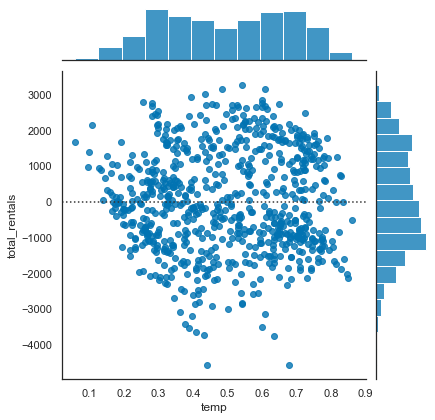

<Figure size 432x288 with 0 Axes>

In [64]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=bike_share,
        order=2)

plt.show()
plt.clf()

D:\installations\anaconda\lib\site-packages\seaborn\axisgrid.py:2036: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


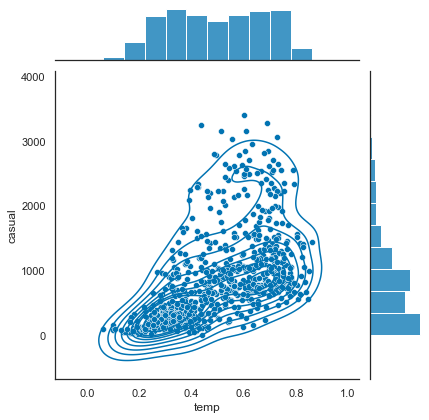

<Figure size 432x288 with 0 Axes>

In [65]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=bike_share,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

D:\installations\anaconda\lib\site-packages\seaborn\axisgrid.py:2036: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


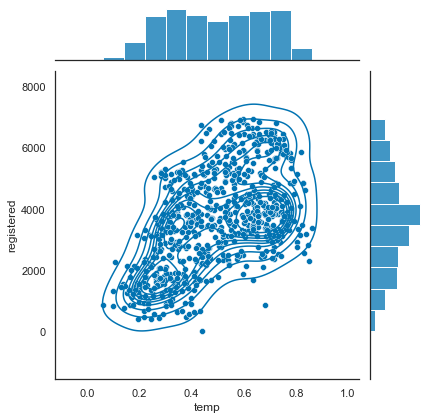

<Figure size 432x288 with 0 Axes>

In [66]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=bike_share,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()